<a href="https://colab.research.google.com/github/LyesDemri/AM-Modulation-Demodulation/blob/main/AM_Modulation_%26_Demodulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

m= 0.4
fc2= 15.915494309189537


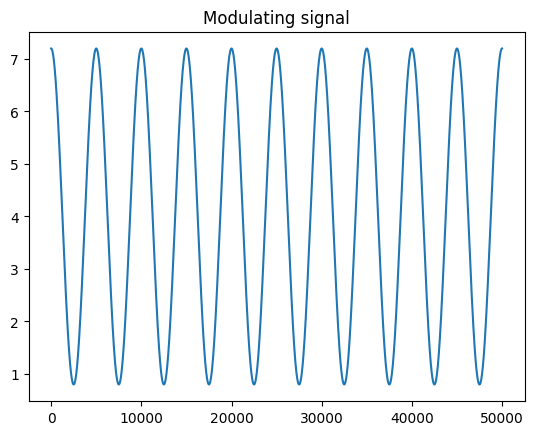

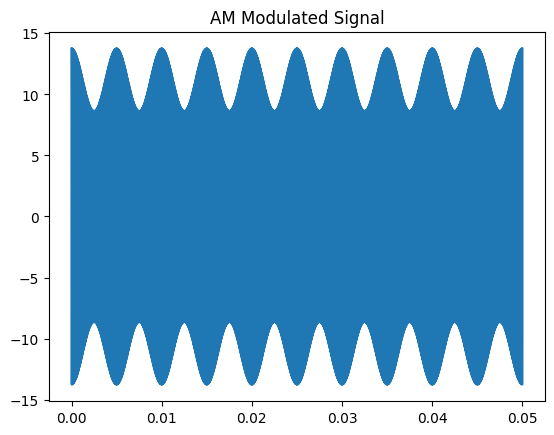

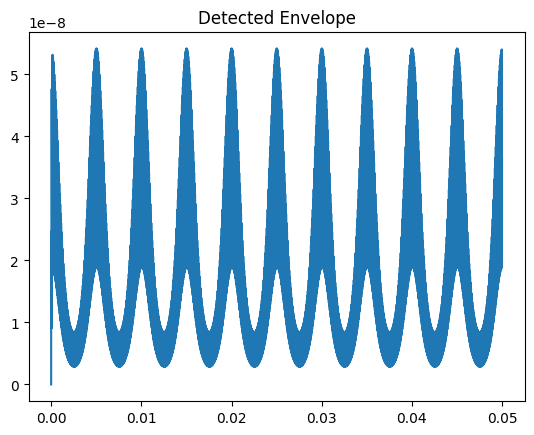

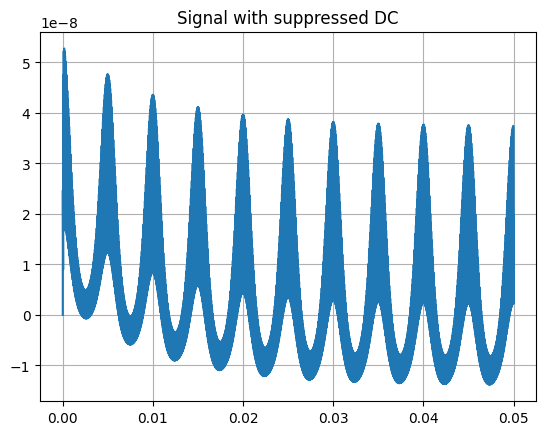

In [5]:
%reset -f

import numpy as np
from numpy import pi,cos,sin
import matplotlib.pyplot as plt

#Set up the simulation
Fe=1000000;Te=1/Fe;
Ap=8;Fp=20000;
A0=4;Am=3.2;Fm=200;
print('m=',Am/Ap)
t=np.arange(0,10/Fm,Te);
x=A0+Am*cos(2*pi*Fm*t);   #Modulating signal
s=(Ap+x)*cos(2*pi*Fp*t);  #AM modulated signal
s=0.1*x*Ap*cos(2*pi*Fp*t)+Ap*cos(2*pi*Fp*t);
plt.plot(x);plt.title("Modulating signal");
plt.figure();plt.plot(t,s);plt.title("AM Modulated Signal")

#Demodulation:
s=s*0.01; #The received signal is attenuated
#The signal is demodulated using a linear detector,
#that is, a diode in series with a parallel RC circuit
C=33e-9;R=1e3;

#Circuit equations:
#U=uD+uR=uD+uC    (U: input voltage)
#uR=uC            (uR: uResistor, uC: uCapacitor)
#uR=R*iR          (iR: current across resistor)
#uC=int(iC*dt)/C+uC0  (iC: current across capacitor)
#iC=C*dUc/dt
#iD=iR+iC         (iD: current across diode)

#t=0: uC=0, uR=0, iR=0, uD=U  (circuit initial conditions)
#Let's turn all of this into code:
uC=np.zeros(len(s));
uR=np.zeros(len(s));
uD=np.zeros(len(s));uD[0] = s[0];
iR = uR/R;
iS = 1e-12;
iD=iS*(np.exp(uD/0.026)-1);
iC=iD;

#Now let's start the simulation
t=0;
for t in range(1,len(s)):
  uC[t] = uC[t-1] + iC[t-1]*Te/C;
  iR[t] = uC[t]/R;
  uD[t] = s[t]-uC[t];
  iC[t] = iD[t-1] - iR[t-1];
  iD[t] = iS*(np.exp(uD[t]/0.026)-1);
  iC[t] = iD[t]-iR[t];

plt.figure();plt.plot(np.arange(len(uC))*Te,uC);plt.title("Detected Envelope");

#DC suppression:
#The DC suppression is performed by a simple highpass RC filter
#Here are its equations
#uC=uC2+uR2
#iR2=iC2
#t=0 -> uC2=0, uR2=uC

C2=100e-9;
R2=100e3;
print('fc2=',1/(2*np.pi*R2*C2));
uC2=np.zeros(len(uC));
uR2=np.zeros(len(uC));uR2[0]=uC[0];
iR2=uR2/R2;

for t in range(1,len(uC)):
  uC2[t] = uC2[t-1] + iR2[t-1]*Te/C2;
  uR2[t] = uC[t]-uC2[t];
  iR2[t] = uR2[t]/R2;

plt.figure();plt.plot(np.arange(len(uR2))*Te,uR2);plt.grid();plt.title('Signal with suppressed DC');